In [1]:
import numpy as np
import random
from rdkit import Chem
import matplotlib.pyplot as plt
from utils import load_dataset_df, fp_generator

No normalization for SPS. Feature removed!
No normalization for AvgIpc. Feature removed!
No normalization for NumAmideBonds. Feature removed!
No normalization for NumAtomStereoCenters. Feature removed!
No normalization for NumBridgeheadAtoms. Feature removed!
No normalization for NumHeterocycles. Feature removed!
No normalization for NumSpiroAtoms. Feature removed!
No normalization for NumUnspecifiedAtomStereoCenters. Feature removed!
No normalization for Phi. Feature removed!
Skipped loading some Tensorflow models, missing a dependency. No module named 'tensorflow'
Skipped loading modules with pytorch-geometric dependency, missing a dependency. No module named 'torch_geometric'
Skipped loading modules with transformers dependency. No module named 'transformers'
cannot import name 'HuggingFaceModel' from 'deepchem.models.torch_models' (c:\Users\knsve\Desktop\MEI\Tese\torch\snn_venv\lib\site-packages\deepchem\models\torch_models\__init__.py)
Skipped loading modules with pytorch-geometri

#### Load DataFrame

In [2]:
files = ['tox21.csv','sider.csv', 'BBBP.csv']
dt_file = files[2]

df, targets = load_dataset_df(filename=dt_file)
print(targets)

target_name = targets[0]
df = df[[target_name, 'smiles']].dropna()


['p_np']


#### Molecule to Fingerprint Vizualization

[Cl].C1=CC=CC2=C1[N](C=C2CCC3=CC=NC=C3)CC4=CC=CC=C4
56
21 ((12, 2),)
32 ((21, 3),)
42 ((20, 2), (24, 2))
45 ((6, 1),)
64 ((2, 1), (3, 1), (21, 1), (22, 1), (23, 1))


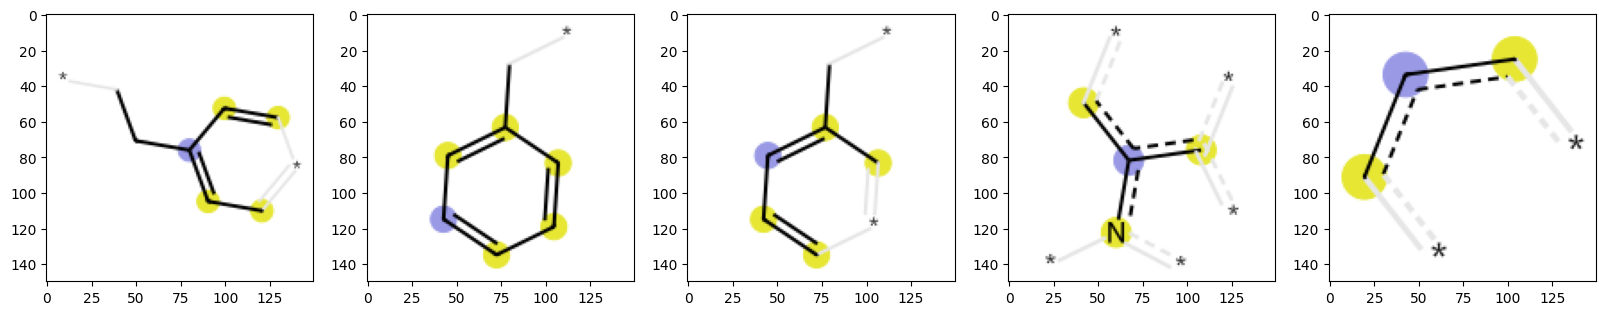

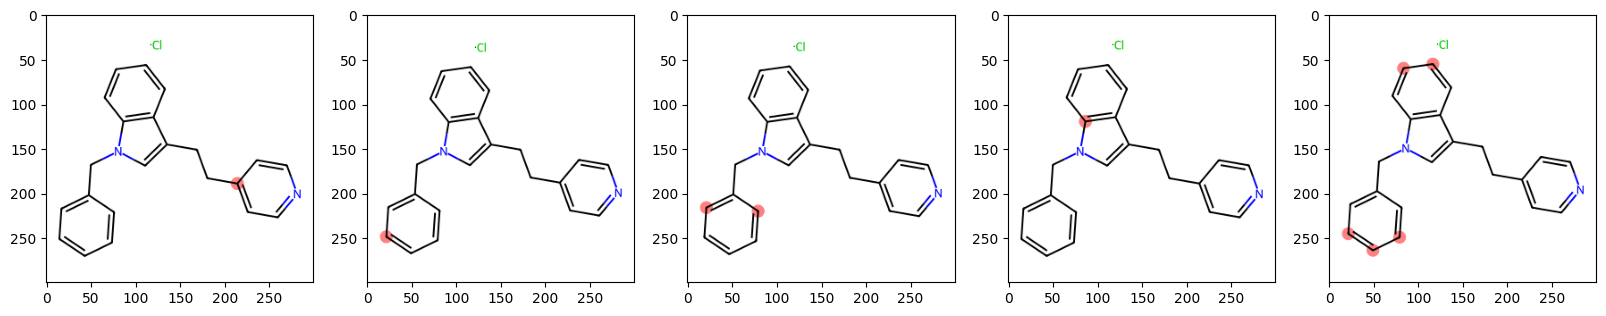

In [97]:
from rdkit.Chem import Draw, AllChem
from IPython.display import display


row = df.iloc[random.randint(0, len(df))]
print(row['smiles'])
mol = Chem.MolFromSmiles(row['smiles'])

if mol is not None:
    img = Draw.MolToImage(mol)

#TODO: (at a later point)
""" mol2 = Chem.RWMol(mol)
mol2 = mol2.RemoveAtom(1)

mol2 = Chem.MolToSmiles(mol2)
mol2 = Chem.SanitizeMol(mol2)


mol2 = Chem.Mol(mol2)
img2 = Draw.MolToImage(mol2)
display(img2) """

fpgen = fp_generator('morgan', radius=3)
ao = AllChem.AdditionalOutput()
ao.CollectBitInfoMap()

fp = fpgen(mol,additionalOutput=ao) ## tentar converter para (#, #) e depois para bits
bi = ao.GetBitInfoMap()

fp = np.array(fp)
print(fp.sum())
fig, axs = plt.subplots(1, 5, figsize=(20, 20))
fig2, axs2 = plt.subplots(1, 5, figsize=(20, 20))

for i, id in enumerate(list(bi.keys())[:5]):
    print(id, bi[id])
    mfp2_svg = Draw.DrawMorganBit(mol, bitId=id, bitInfo=bi)

    atoms = [info[0] for info in bi[id]]
    colors = {idx: (1, 1, 0) for idx in atoms}

    img2 = Draw.MolToImage(mol, highlightAtoms=atoms, highlightAtomColors=colors)
    
    axs[i].imshow(mfp2_svg)
    axs2[i].imshow(img2)


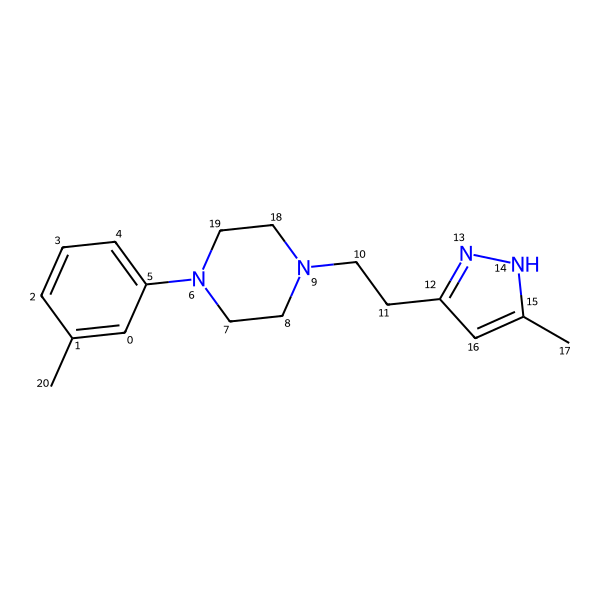

In [52]:
for i, atom in enumerate(mol.GetAtoms()):
    # For each atom, set the property "molAtomMapNumber" to a custom number, let's say, the index of the atom in the molecule
    atom.SetProp("atomNote", f"{i}")
    
Draw.MolToImage(mol, size=(600, 600))

In [95]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.rdchem import Mol
from IPython.display import display

# Function to extract random substructures
def get_substructures(mol, num_subs=2, sub_size=6):
    fragments = []
    for _ in range(num_subs):
        atom_indices = random.sample(range(mol.GetNumAtoms()), min(sub_size, mol.GetNumAtoms()))
        submol = Chem.PathToSubmol(mol, atom_indices)
        Chem.Kekulize(submol, clearAromaticFlags=True)  # Convert aromatic bonds to simple bonds
        fragments.append(submol)
    return fragments

# Sample molecule from dataframe

print(row['smiles'])
mol = Chem.MolFromSmiles(row['smiles'])

if mol:
    substructures = get_substructures(mol)
    for submol in substructures:
        img = Draw.MolToImage(submol)  # Generates a simple black-and-white image
        display(img)

C1=N[N](C2=C1C(=C(C(=N2)C)C(OCC)=O)NCCCC)CC


[00:18:45] non-ring atom 0 marked aromatic


AtomKekulizeException: non-ring atom 0 marked aromatic